<a href="https://colab.research.google.com/github/Alwaysadil/Image-Classification/blob/main/White_Blood_Cell_Image_Classifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Leukocytes(WBC) types Image Classification i.e,

  Neutrophils


  Eosinophil


  Lymphocytes


  Monocytes



In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload() #Choose the kaggle.json file that  downloaded by Creating New API Token in kaggle account section

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bashproj","key":"e167a651faf34eda92654629bcab88b8"}'}

In [3]:
#Make directory named kaggle and copy kaggle.json file here
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/blood-cells

100% 108M/108M [00:07<00:00, 19.6MB/s]
100% 108M/108M [00:07<00:00, 14.8MB/s]


In [5]:
from zipfile import ZipFile
file_name="blood-cells.zip"

with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [7]:
train_dir = '/content/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/dataset2-master/dataset2-master/images/TEST'

In [8]:
#LOADING IMAGE DATA
# Create generators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [9]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [10]:
#Build Pretrained Model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [11]:
#Build Classification Model
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [12]:
#TRANING
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
249/249 [==============================] - 38s 89ms/step - loss: 0.8448 - accuracy: 0.6568 - val_loss: 0.5722 - val_accuracy: 0.7858
Epoch 2/100
249/249 [==============================] - 20s 80ms/step - loss: 0.4814 - accuracy: 0.8144 - val_loss: 0.4448 - val_accuracy: 0.8291
Epoch 3/100
249/249 [==============================] - 21s 86ms/step - loss: 0.3623 - accuracy: 0.8638 - val_loss: 0.3941 - val_accuracy: 0.8431
Epoch 4/100
249/249 [==============================] - 19s 78ms/step - loss: 0.2980 - accuracy: 0.8886 - val_loss: 0.3418 - val_accuracy: 0.8612
Epoch 5/100
249/249 [==============================] - 20s 79ms/step - loss: 0.2288 - accuracy: 0.9182 - val_loss: 0.2897 - val_accuracy: 0.8819
Epoch 6/100
249/249 [==============================] - 21s 86ms/step - loss: 0.1851 - accuracy: 0.9337 - val_loss: 0.2544 - val_accuracy: 0.8989
Epoch 7/100
249/249 [==============================] - 19s 75ms/step - loss: 0.1566 - accuracy: 0.9478 - val_loss: 0.2189 - val_ac

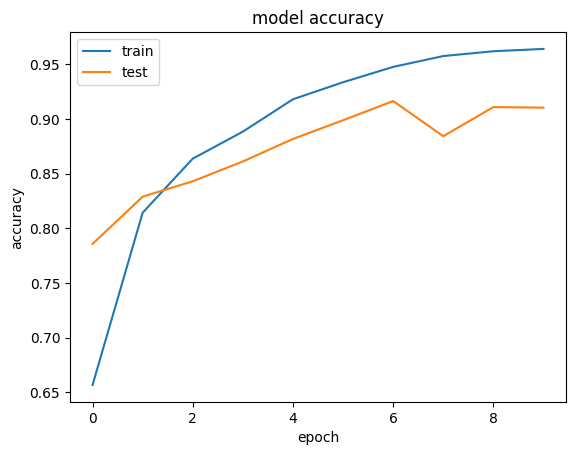

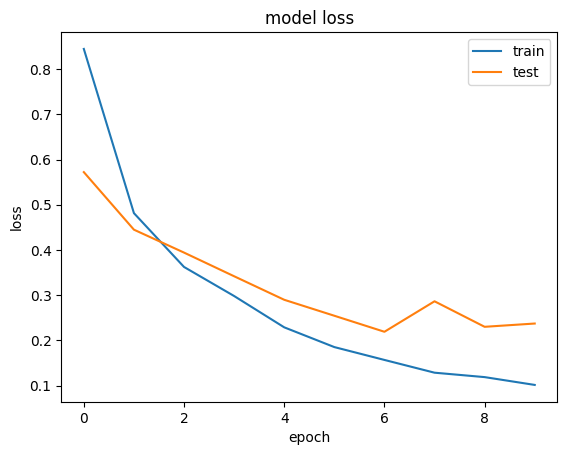

In [13]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()


In [14]:
#RESULTS
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

78/78 [==============================] - 12s 139ms/step
Test Accuracy: 53.357%


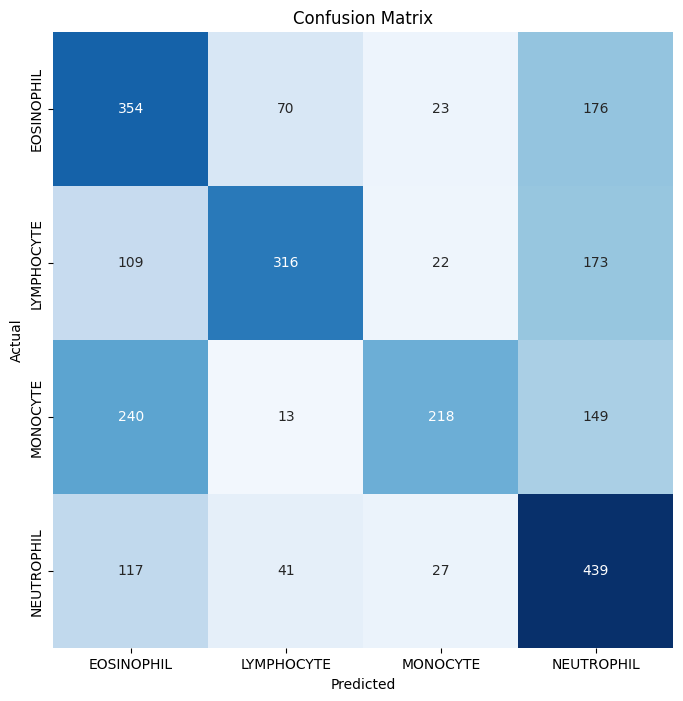

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.43      0.57      0.49       623
  LYMPHOCYTE       0.72      0.51      0.60       620
    MONOCYTE       0.75      0.35      0.48       620
  NEUTROPHIL       0.47      0.70      0.56       624

    accuracy                           0.53      2487
   macro avg       0.59      0.53      0.53      2487
weighted avg       0.59      0.53      0.53      2487



In [15]:


predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 1989 images belonging to 4 classes.
63/63 [==============================] - 4s 60ms/step
Validation Accuracy: 91.654%


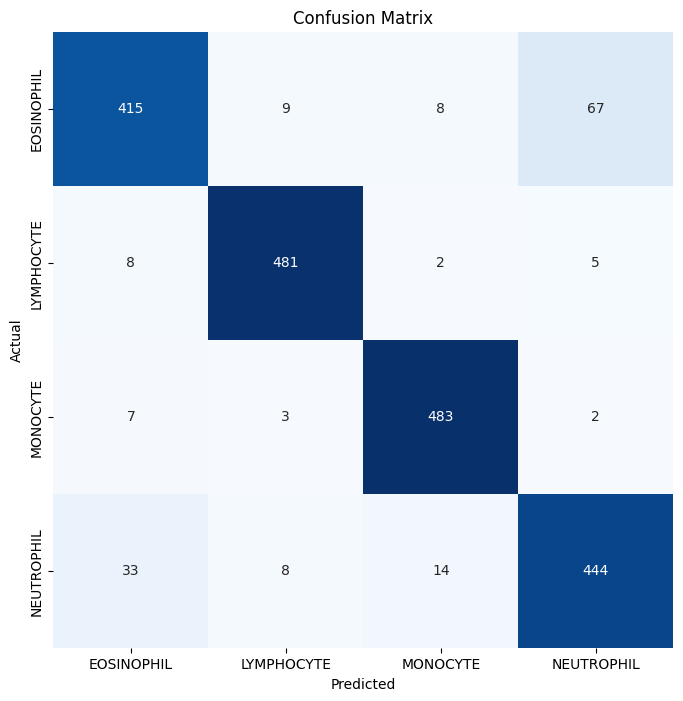

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.90      0.83      0.86       499
  LYMPHOCYTE       0.96      0.97      0.96       496
    MONOCYTE       0.95      0.98      0.96       495
  NEUTROPHIL       0.86      0.89      0.87       499

    accuracy                           0.92      1989
   macro avg       0.92      0.92      0.92      1989
weighted avg       0.92      0.92      0.92      1989



In [16]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)